## Linear Regression
The loss function for training can be diferent than the performance measure for the model. The loss function needs to be something that makes optimization practical, and it may contain regularization, which is not part of the model, only part of the training.

A good metric is closely aligned to the business goal. A good training loss is easy to optimize and strongly correlated with the metric.

## Normal Equation
Normal equation is a closed form slotion to solve for the ideal theta (weights)
Theta = (X.t * X) ^ -1 * X.t * y

In [1]:
import numpy as np

np.random.seed(42)
m = 100 
X = 2 * np.random.rand(m,1)
y = 4 + 3 * X + np.random.randn(m,1)

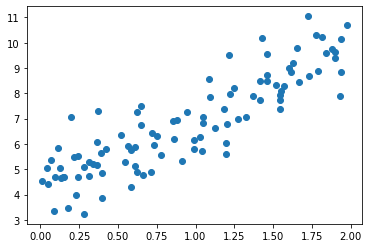

In [2]:
import matplotlib.pyplot as plt

plt.plot(X,y,"o")
plt.show()

In [3]:
from sklearn.preprocessing import add_dummy_feature

X_b = add_dummy_feature(X)
# the @ operator performs matrix multiplication 
# A @ B is equivelent to np.matmul(A, B)
theta_best = np.linalg.inv(X_b.T @ X_b) @ X_b.T @ y

In [4]:
theta_best

array([[4.21509616],
       [2.77011339]])

The formula to generate the dots was y = 4 + 3x + noise
What we found was 4.2 + 2.77x. The noise made it impossible to find the correct equestion. The smaller and noisier the data set, the harder it is to recover the formula.

In [5]:
# We can make predictions now
X_new = np.array([[0],[2]])
X_new_b = add_dummy_feature(X_new) 
y_predict = X_new_b @ theta_best
y_predict

array([[4.21509616],
       [9.75532293]])

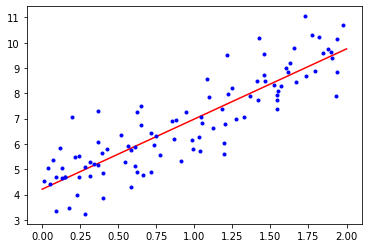

In [6]:
plt.plot(X_new, y_predict, "r-", label="Predictions")
plt.plot(X, y, "b.")
plt.show()

In [7]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X,y)
lin_reg.intercept_, lin_reg.coef_

(array([4.21509616]), array([[2.77011339]]))

In [8]:
theta_best_svd, residuals, rank, s = np.linalg.lstsq(X_b, y, rcond=1e-6)
theta_best_svd

array([[4.21509616],
       [2.77011339]])

In [9]:
np.linalg.pinv(X_b) @ y

array([[4.21509616],
       [2.77011339]])

## Gradient Descent

In [10]:
eta = 0.1
n_epochs = 1000
m = len(X_b)

np.random.seed(42)
theta = np.random.randn(2,1)

for epoch in range(n_epochs):
    gradients = 2 / m * X_b.T @ (X_b @ theta - y)
    theta = theta - eta * gradients

theta

array([[4.21509616],
       [2.77011339]])

### Stochastic Gradient Descent

In [11]:
n_epochs = 50
t0, t1 = 5, 50 

def learning_schedule(t):
    return t0 / (t + t1)

np.random.seed(42)
theta = np.random.randn(2, 1)

for epoch in range(n_epochs):
    for iteration in range(m):
        random_index = np.random.randint(m)
        xi = X_b[random_index : random_index + 1]
        yi = y[random_index : random_index + 1]
        gradients = 2 * xi.T @ (xi @ theta - yi)
        eta = learning_schedule(epoch * m + iteration)
        theta = theta - eta * gradients

In [12]:
theta

array([[4.21076011],
       [2.74856079]])

In [13]:
from sklearn.linear_model import SGDRegressor

sgd_reg = SGDRegressor(max_iter=1000, tol=1e-5, penalty=None, eta0=0.01,
                      n_iter_no_change=100, random_state=42)
sgd_reg.fit(X, y.ravel())

SGDRegressor(n_iter_no_change=100, penalty=None, random_state=42, tol=1e-05)

In [14]:
sgd_reg.intercept_, sgd_reg.coef_

(array([4.21278812]), array([2.77270267]))

## Polynomial Regession

In [15]:
np.random.seed(42)
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X ** 2 + X + 2 + np.random.rand(m, 1)

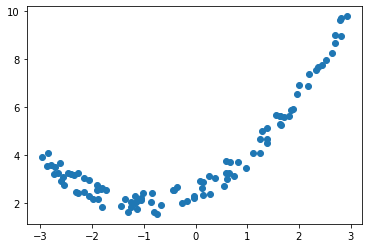

In [16]:
plt.plot(X, y, "o")
plt.show()

In [17]:
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)
X[0], X_poly[0]

(array([-0.75275929]), array([-0.75275929,  0.56664654]))

In [18]:
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)
lin_reg.intercept_, lin_reg.coef_

(array([2.49786712]), array([[0.9943591 , 0.49967213]]))

## Learning Curves

In [19]:
from sklearn.model_selection import learning_curve

train_sizes, train_scores, valid_scores = learning_curve(
    LinearRegression(), X, y, train_sizes=np.linspace(0.01, 1.0, 40), cv=5,
    scoring="neg_root_mean_squared_error")
train_errors = -train_scores.mean(axis=1)
valid_errors = -valid_scores.mean(axis=1)

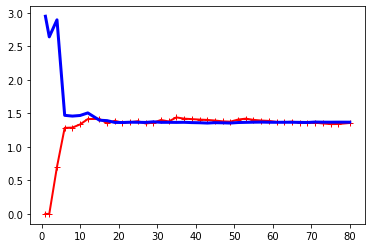

In [20]:
plt.plot(train_sizes, train_errors, "r-+", linewidth=2, label="train")
plt.plot(train_sizes, valid_errors, "b-", linewidth=3, label="valid")
plt.show()

In [21]:
from sklearn.pipeline import make_pipeline

polynomial_regression = make_pipeline(
    PolynomialFeatures(degree=10, include_bias=False),
    LinearRegression())

train_sizes, train_scores, valid_scores = learning_curve(
    polynomial_regression, X, y, train_sizes=np.linspace(0.01, 1.0, 40), cv=5,
    scoring="neg_root_mean_squared_error")

train_errors = -train_scores.mean(axis=1)
valid_errors = -valid_scores.mean(axis=1)

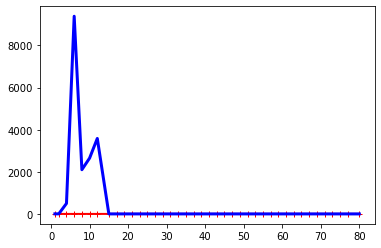

In [22]:
plt.plot(train_sizes, train_errors, "r-+", linewidth=2, label="train")
plt.plot(train_sizes, valid_errors, "b-", linewidth=3, label="valid")
plt.show()

## Regularized Linear Models

### Ridge Regression
alpha / m * SUM(theta[i]^2)  
J(theta) = MSE(theta) + (alpha / m ) * SUM(theta[i]^2)

In Andrew Ng's course, this same regularization used lambda, not alpha. I see confusion ahead!

Note: it is important to scale the features prior to ridge regression. Squaring the weights means that different scales would have an outsized effect.

In [23]:
# ridge regression can be included in the closed-form solution (normal equation)
from sklearn.linear_model import Ridge
ridge_reg = Ridge(alpha=0.1, solver="cholesky")
ridge_reg.fit(X, y)
ridge_reg.predict([[1.5]])

array([[5.44714236]])

In [24]:
sgd_reg = SGDRegressor(penalty="l2", alpha=0.1 / m, tol=None,
                      max_iter=1000, eta0=0.01, random_state=42)
sgd_reg.fit(X, y.ravel()) # y.ravel because fit() expects 1D targets
sgd_reg.predict([[1.5]])

array([5.44590102])

## Lasso Regression
Least absolute shrinkage and selection operator regression. It uses the L1 norm instead of the L2 norm as a regulaization term.   
J(theta) = MSE(theta) + 2*alpha * SUM(abs(theta[i]))  
Lasso regression tends to reduce the weights of the least important features, even down to 0. Lasso regression automatically performs feature selection and outputs a sparse model, with few nonzero feature weights.

Lasso regression optimizes more slowly than ridge regression, and as you get closer to the solution you need to decrease the learning rate.

In [25]:
from sklearn.linear_model import Lasso
lasso_reg = Lasso(alpha=0.1)
# alternately could use SGDRegressor(penalty=l1, alpha=0.1)

lasso_reg.fit(X, y)

lasso_reg.predict([[1.5]])

array([5.3944001])

### Elasitc Net Regression
Elastic net regression is a middle ground between ridge and lasso. The regularization term is a weighted sum of both ridge and lasso. You control the mix with ratio `r`. When r=0, it is ridge regression, when r=1, it is lasso regression

**When should you use ridge/lasso/elastic net?**  
It is almost always preferable to have some regularization, as opposed to plain linear regression. Ridge is a good default, but if you suspect that only a few features are useful, you should prefer lasso or elastic net, as it reduces useless features' weights to 0.In general elastic net is preferred to lasso because lasso may behave erratically when the number of features is greater than number of training instances (n > m) or when several features are correlated

In [26]:
from sklearn.linear_model import ElasticNet
elastic_net = ElasticNet(alpha=0.1, l1_ratio=0.5)
elastic_net.fit(X,y)
elastic_net.predict([[1.5]])

array([5.39746654])

### Early Stopping

In [27]:
from copy import deepcopy
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler

X_train, y_train, X_valid, y_valid = X[80:], y[80:], X[:80], y[:80]
preprocessing = make_pipeline(PolynomialFeatures(degree=90, include_bias=False), StandardScaler())
X_train_prep = preprocessing.fit_transform(X_train)
X_valid_prep = preprocessing.transform(X_valid)
sgd_reg = SGDRegressor(penalty=None, eta0=0.002, random_state=42)
n_epochs = 500
best_valid_rmse = float('inf')

for epoc in range(n_epochs):
    sgd_reg.partial_fit(X_train_prep, y_train.ravel())
    y_valid_predict = sgd_reg.predict(X_valid_prep)
    val_error = mean_squared_error(y_valid, y_valid_predict.ravel(), squared=False)
    if val_error < best_valid_rmse:
        best_valid_rmse = val_error
        best_model = deepcopy(sgd_reg)

## Logistic Regression

In [28]:
from sklearn.datasets import load_iris
iris = load_iris(as_frame=True)
list(iris)

['data',
 'target',
 'frame',
 'target_names',
 'DESCR',
 'feature_names',
 'filename',
 'data_module']

In [29]:
iris.data.head(3)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2


In [30]:
iris.target.head(3)

0    0
1    0
2    0
Name: target, dtype: int64

In [31]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [33]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

X = iris.data[["petal width (cm)"]].values
y = iris.target_names[iris.target] == 'virginica'
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

log_reg = LogisticRegression(random_state=42)
log_reg.fit(X_train, y_train)

LogisticRegression(random_state=42)

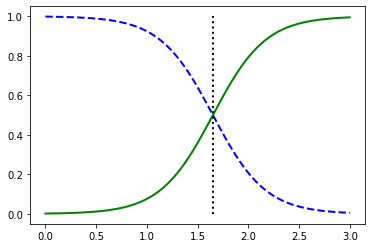

In [36]:
X_new = np.linspace(0,3,1000).reshape(-1, 1)
y_proba = log_reg.predict_proba(X_new)
decision_boundary = X_new[y_proba[:, 1] >= 0.5][0,0]
plt.plot(X_new, y_proba[:,0], "b--", linewidth=2, label="Not Iris Vriginica proba")
plt.plot(X_new, y_proba[:, 1], "g-", linewidth=2, label="Iris Virginica proba")
plt.plot([decision_boundary, decision_boundary], [0,1], "k:", linewidth=2, label="decision boundary")
plt.show()

In [37]:
decision_boundary

1.6516516516516517

In [38]:
log_reg.predict([[1.7], [1.5]])

array([ True, False])

In [39]:
log_reg.predict_proba([[1.7], [1.5]])

array([[0.4529122 , 0.5470878 ],
       [0.64069097, 0.35930903]])

## Softmax Regression

In [41]:
X = iris.data[["petal length (cm)", "petal width (cm)"]].values
y = iris["target"]
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

softmax_reg = LogisticRegression(C=30, random_state=42) # C assigns a weight to L2 regularization
softmax_reg.fit(X_train, y_train)

LogisticRegression(C=30, random_state=42)

In [42]:
softmax_reg.predict([[5,2]])

array([2])

In [44]:
softmax_reg.predict_proba([[5,2]]).round(2)

array([[0.  , 0.04, 0.96]])